<a href="https://colab.research.google.com/github/trujoan/Identificador-de-palabras/blob/main/nubepalabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nube de palabras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


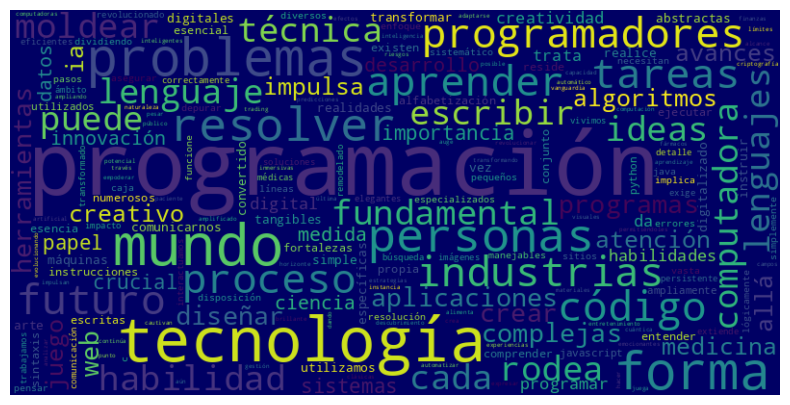

In [ ]:
#importar librerias
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

#Se descargan las "Stopwords"
nltk.download('stopwords')

#Se crea la funcion que servira para subir el documento y analizar su contenido
def cargar_documento(filepath):
  #comando para abrir y leer el archivo
  with open(filepath, 'r', encoding='utf-8') as archivo:
    texto = archivo.read()
    return texto

#funcion para limpiar el texto
def limpiar_texto(texto):
  #se convierte el texto a minusculas
  texto = texto.lower()
  #se eliminan los caracteres especiales
  texto = re.sub(r'\W+', ' ', texto)
  return texto

#se genera las nubes de palabras
def generar_nube(texto):
  #se eliminan las stopwords para eliminar redundancia
  palabras = texto.split()
  stop_words = set(stopwords.words('spanish'))
  palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]

  #aca se cuenta la cantidad de veces que se repite las palabras (frecuencia)
  frecuencia = Counter(palabras_filtradas)

  #Se genera la imagen que se va a motrar
  nube = WordCloud(width=800, height=400, background_color=(0, 0, 100)).generate_from_frequencies(frecuencia)

  #usando matplotib se muestra la imagen final
  plt.figure(figsize=(10, 5))
  plt.imshow(nube, interpolation='bilinear')
  plt.axis('off')
  plt.show()

#Funcion principal para subir el archivo y generar la nube
def crear_nube_desde_documento(filepath):
  #se carga el documento limpio
  texto = cargar_documento(filepath)
  texto_limpio = limpiar_texto(texto)
  #se genera la nube de palabras
  generar_nube(texto_limpio)

#ejecucion del codigo
crear_nube_desde_documento('/content/pruebina.txt')